In [1]:
# libraries
import numpy as np
import random

from ab_test import ab_aggregate, ab_accumulating

In [2]:
# generate 14 days sample conversion data
random.seed(1234)
control_conversions = np.array([random.randrange(1249,1251) for i in range(0,14)])
variant_conversions = np.array([random.randrange(1275,1280) for i in range(0,14)])
control_n = np.array([random.randrange(5000,5100) for i in range(0,14)])
variant_n = np.array([random.randrange(5000,5100) for i in range(0,14)])

In [3]:
control_conversions_total = control_conversions.sum()
variant_conversions_total = variant_conversions.sum()
control_n_total = control_n.sum()
variant_n_total = variant_n.sum()

In [4]:
# set up experiment
experiment = ab_aggregate(
    control_conversions = control_conversions_total,
    variant_conversions = variant_conversions_total,
    control_n = control_n_total,
    variant_n = variant_n_total)

# frequentist
experiment.frequentist(one_tailed = False)

Control CTR: 24.7418 % 
Variant CTR: 25.3047 % 
Relative Uplift: 2.28 % 
z-statistic: 2.4428 
p-value: 0.0146 
Conversion Rate Difference (variant-to-control): 0.56 % 
Confidence Interval for Conversion Rate Difference (95%):  [ 0.1113 % -  1.0145 % ]


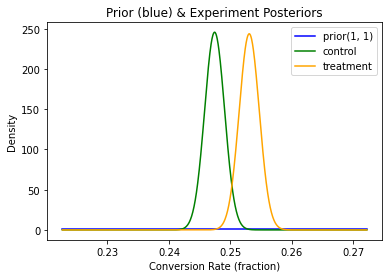

Control CTR (%): 24.7418 
Variant CTR (%): 25.3047 
Relative Uplift (%): 2.28 

Modeled Posterior Control CTR (%): 24.7457 
Modeled Posterior Variant CTR (%): 25.3084 
Prior CTR (%): None 
Probability variant is better than control (%): 99.6


In [5]:
# bayesian, weakest priors
experiment.bayesian()

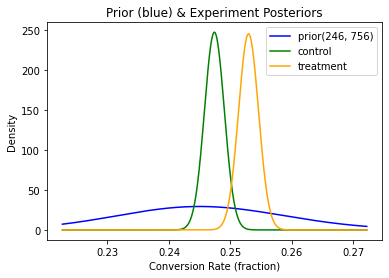

Control CTR (%): 24.7418 
Variant CTR (%): 25.3047 
Relative Uplift (%): 2.28 

Modeled Posterior Control CTR (%): 24.7368 
Modeled Posterior Variant CTR (%): 25.2988 
Prior CTR (%): 24.5000 
Probability variant is better than control (%): 99.6


In [6]:
# bayesian, weak prior
n = 1000
prior_success = round(0.245*n)
prior_failure = round(n - prior_success)

experiment.bayesian(prior_success=prior_success, prior_failure=prior_failure)

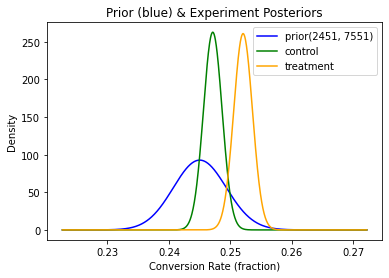

Control CTR (%): 24.7418 
Variant CTR (%): 25.3047 
Relative Uplift (%): 2.28 

Modeled Posterior Control CTR (%): 24.7060 
Modeled Posterior Variant CTR (%): 25.2047 
Prior CTR (%): 24.5000 
Probability variant is better than control (%): 98.6


In [7]:
# bayesian, medium prior
n = 10000
prior_success = round(0.245*n)
prior_failure = round(n - prior_success)

experiment.bayesian(prior_success=prior_success, prior_failure=prior_failure)

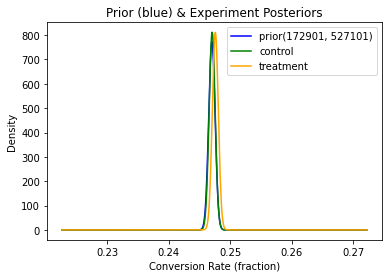

Control CTR (%): 24.7418 
Variant CTR (%): 25.3047 
Relative Uplift (%): 2.28 

Modeled Posterior Control CTR (%): 24.7034 
Modeled Posterior Variant CTR (%): 24.7556 
Prior CTR (%): 24.7000 
Probability variant is better than control (%): 77.10000000000001


In [8]:
# bayesian, strong prior
n = 700000
prior_success = round(0.247*n)
prior_failure = round(n - prior_success)

experiment.bayesian(prior_success=prior_success, prior_failure=prior_failure)

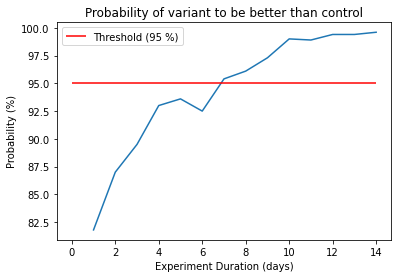

In [9]:
# bayesian, accumulating daily results
# set up experiment
experiment_daily = ab_accumulating(
    control_conversions=control_conversions,
    control_n=control_n,
    variant_conversions=variant_conversions,
    variant_n=variant_n)

days, prob_var_better_than_ctrl = experiment_daily.bayesian(n_days = None)